# DS7331 Project 1 
#### Group 2: Hollie Gardner, Cleveland Johnson, Shelby Provost
Dataset from https://archive-beta.ics.uci.edu/ml/datasets/census+income

In [36]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

## Lab One - Visualization and Data Preprocessing 
### Part One: Business Understanding 
* **Describe the purpose of the data set you selected (i.e., why was this data collected in the first place?).**<br>
    <br>Census data is regularly collected by the Census Bureau in order for the government to understand the characteristics of US population. Data collected from every household in the US through the census surveys typically includes details on a number of items such as number of people in the household, income, profession, race/ethnity, languages spoken, sex, age, etc. This dataset was extract from the 1994 Census database by Barry Becker for the purpose of predicting if an individual's income is greater than $50k.<br>
    <br>

* **Describe how you would define and measure the outcomes from the dataset.**<br>
    <br>[Not sure what this is asking]<br>
    <br>
    
* **Why is this data important and how do you know if you have mined useful knowledge from the dataset?**<br>
    <br>This data is important because it helps the government understand the health of the economy and the ability of citizens to participate fully in the economy. The data can assist government offices in identifying priorities for initiatives or policies to push forward. Furthermore, the data can provide some insight into any inequities that exist within sex, age, or race categories or comparing similar jobs across private and government sectors. Useful knowledge mined from the dataset would be able to confidently explain possible relationships from correlations between the <br>
    <br>
* **How would you measure the effectiveness of a good prediction algorithm?**<br>
    <br>The effectiveness of a good prediction algorithm would be measured through the error rates of the algorithm's ability to classify individuals in the test set in the right income category based off of the attributes provided.

### Part Two: EDA 
**1. Describe the meaning and type of data (scale, values, etc.) for each attribute in the data file.**



This dataset contains 15 attributes for 32,560 instances in the training set. The test set includes an additional 16,281 instances. In addition to the code below, details were obtained from the adult.names file provided by dataset donors from the above linked UCI website.

The attribute descriptions are as follows:
* **age** (continuous, range ): This is the age of the individual. 
* **workclass** (categorical, levels): Work class is the sector or category of the individual's occupation
* **fnlwgt** (continuous, range): Final Weight is 
* **education** (categorical, levels):
* **education-num** (continuous, range):
* **marital-status** (categorical, levels):
* **occupation** (categorical, levels):
* **relationship** (categorical, levels):
* **race** (categorical, levels):
* **sex** (categorical, 2 levels):
* **capital-gain** (continuous, range): 
* **capital-loss** (continuous, range):
* **hours-per-week** (continous, range):
* **native-country** (categorical, levels):
* **income** (categorical, 2 levels): This item was converted using Find & Replace in Excel to 0 for less than 50K and 1 for greater than 50K.
<br>
<br>Description of Final Weight from adult.names file -- 
<br>|
<br>| The weights on the CPS files are controlled to independent estimates of the
<br>| civilian noninstitutional population of the US.  These are prepared monthly
<br>| for us by Population Division here at the Census Bureau.  We use 3 sets of
<br>| controls.
<br>|  These are:
<br>|          1.  A single cell estimate of the population 16+ for each state.
<br>|          2.  Controls for Hispanic Origin by age and sex.
<br>|          3.  Controls by Race, age and sex.
<br>|
<br>| We use all three sets of controls in our weighting program and "rake" through
<br>| them 6 times so that by the end we come back to all the controls we used.
<br>|
<br>| The term estimate refers to population totals derived from CPS by creating
<br>| "weighted tallies" of any specified socio-economic characteristics of the
<br>| population.
<br>|
<br>| People with similar demographic characteristics should have
<br>| similar weights.  There is one important caveat to remember
<br>| about this statement.  That is that since the CPS sample is
<br>| actually a collection of 51 state samples, each with its own
<br>| probability of selection, the statement only applies within
<br>| state.

In [39]:
# Importing the census dataset using pandas
# Reading the CSV file
df = pd.read_csv('adult-data.csv')

# Getting a first look at the dataset
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [40]:
#summary of the dataset
print (df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 3.7+ MB
None


**2. Explain any missing values, duplicate data, and outliers. Are those mistakes? How do you deal with these problems?**<br>
<br>
    According to the Kohavi and Becker, the following changes were made:
     <br>    1. Discretized agrossincome into two ranges with threshold 50,000.
     <br>    2. Convert U.S. to US to avoid periods.
     <br>    3. Convert Unknown to "?"
     <br>    4. Run MLC++ GenCVFiles to generate data,test. <br>
<br>We verified that the missing values or the "?" had been removed. If there had been missing values, we could have performed one of the following options:<br>
* remove the lines containing missing values
* replace with the mean of the column
* grouped by an important attribute level and then imputed with the mean of the column for the group for the continuous variable
<br>
If the 6 duplicates from the original raw dataset that were identified by Kohavi and Becker were still present, we would have investigated further to see how likely it would be to have duplicates. Since the instances were no longer as specific and there is no longer a unique identifier associated with each instance, it would seem possible that a small number of individuals would have matching characteristics. Therefore, we probably would have kept the duplicates.

In [41]:
#verifying that the unknown values have been removed

# replace '?' with -1
df = df.replace(to_replace='?',value=-1) 

df = df.replace(to_replace=-1,value=np.nan)
print (df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 3.7+ MB
None


In [42]:
#verifying the 6 duplicates have been removed
print(df.duplicated(subset=None, keep='first'))
df.info()

0        False
1        False
2        False
3        False
4        False
         ...  
32556    False
32557    False
32558    False
32559    False
32560    False
Length: 32561, dtype: bool
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  ob

**3. Give simple, appropriate statistics (range, mode, mean, median, variance, counts, etc.) for the most important attributes and describe what they mean or if you found something interesting. Note: You can also use data from other sources for comparison. Explain the significance of the statistics run and why they are meaningful.**

In [43]:
#viewing the statistics for the continous attributes
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456,0.240810
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429,0.427581
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [53]:
#Aggregating by race and income over 50K - code adapted from asynch 2 notebook
df_grouped = df.groupby(by='race')
print (df_grouped.income.sum() / df_grouped.income.count())#percentage
df_grouped = df.groupby(by='sex')
print (df_grouped.income.sum() / df_grouped.income.count())#percentage
df_grouped = df.groupby(by='marital-status')
print (df_grouped.income.sum() / df_grouped.income.count())#percentage
df_grouped = df.groupby(by='native-country')
print (df_grouped.income.sum() / df_grouped.income.count())#percentage

race
 Amer-Indian-Eskimo    0.115756
 Asian-Pac-Islander    0.265640
 Black                 0.123880
 Other                 0.092251
 White                 0.255860
Name: income, dtype: float64
sex
 Female    0.109461
 Male      0.305737
Name: income, dtype: float64
marital-status
 Divorced                 0.104209
 Married-AF-spouse        0.434783
 Married-civ-spouse       0.446848
 Married-spouse-absent    0.081340
 Never-married            0.045961
 Separated                0.064390
 Widowed                  0.085599
Name: income, dtype: float64
native-country
 ?                             0.250429
 Cambodia                      0.368421
 Canada                        0.322314
 China                         0.266667
 Columbia                      0.033898
 Cuba                          0.263158
 Dominican-Republic            0.028571
 Ecuador                       0.142857
 El-Salvador                   0.084906
 England                       0.333333
 France                      

In [ ]:
df_grouped = df.groupby(by='occupation')
print (df_grouped.income.sum() / df_grouped.income.count())#percentage
df_grouped = df.groupby(by='workclass')
print (df_grouped.income.sum() / df_grouped.income.count())#percentage

In [46]:
#calculating the percentage of each grouped category by race and sex
df_grouped = df.groupby(by=['race','sex'])
print ("Percentage of individuals with income greater than 50K in each group:")
print (df_grouped.income.sum() / df_grouped.income.count() *100)

Percentage of individuals with income greater than 50K in each group:
race                 sex    
 Amer-Indian-Eskimo   Female    10.084034
                      Male      12.500000
 Asian-Pac-Islander   Female    12.427746
                      Male      33.621934
 Black                Female     5.787781
                      Male      18.929254
 Other                Female     5.504587
                      Male      11.728395
 White                Female    11.895395
                      Male      31.756545
Name: income, dtype: float64


In [47]:
# this python magics will allow plot to be embedded into the notebook - code adapted from asynch 2 nb
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline

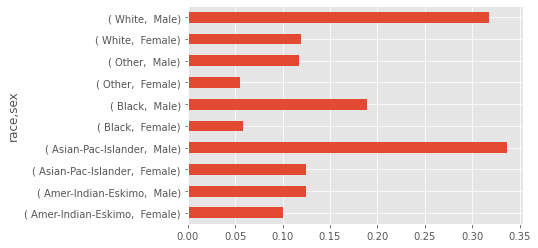

In [48]:
# Start by just plotting what we previsously grouped!
plt.style.use('ggplot')

df_grouped = df.groupby(by=['race','sex'])
income_over50_rate = df_grouped.income.sum() / df_grouped.income.count()
ax = income_over50_rate.plot(kind='barh')

**4. Visualize the most important attributes appropriately (at least 5 attributes). Important: Provide an interpretation for each chart. Explain for each attribute why the chosen visualization is appropriate.**

**5. Explore relationships between attributes: Look at the attributes via scatter plots, correlation, cross-tabulation, group-wise averages, etc. as appropriate. Explain any interesting relationships.** 

**6. Identify and explain interesting relationships between features and the class you are trying to predict (i.e., relationships with variables and the target classification).**

**7. Are there other features that could be added to the data or created from existing features? Which ones?**

**8. Exceptional Work, One idea: implement dimensionality reduction, then visualize and interpret the results.**